**Task 1: Exploratory Data Analysis (EDA) and Business Insights**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/ass/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/ass/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ass/Transactions.csv")


# Display basic information about datasets
print("Customers Dataset:")
print(customers.info(), "\n")

print("Products Dataset:")
print(products.info(), "\n")

print("Transactions Dataset:")
print(transactions.info(), "\n")



Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        

In [18]:
# Check for missing values
print("Missing Values in Customers Dataset:\n", customers.isnull().sum(), "\n")
print("Missing Values in Products Dataset:\n", products.isnull().sum(), "\n")
print("Missing Values in Transactions Dataset:\n", transactions.isnull().sum(), "\n")


Missing Values in Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions Dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [19]:
# Fill missing values with appropriate replacements
customers.fillna("Unknown", inplace=True)
products.fillna({"Category": "Misc"}, inplace=True)
transactions.fillna(0, inplace=True)


In [20]:
# Convert date columns to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Merge datasets
merged_df = transactions.merge(customers, on="CustomerID", how="left")
merged_df = merged_df.merge(products, on="ProductID", how="left")

In [21]:
# Display first few rows of merged dataset
print("Merged Dataset:")
print(merged_df.head(), "\n")

# Summary statistics of numerical columns
print("Summary Statistics:")
print(merged_df.describe(), "\n")

Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Spe

<ipython-input-22-0bfdf654f149>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index, palette="viridis")


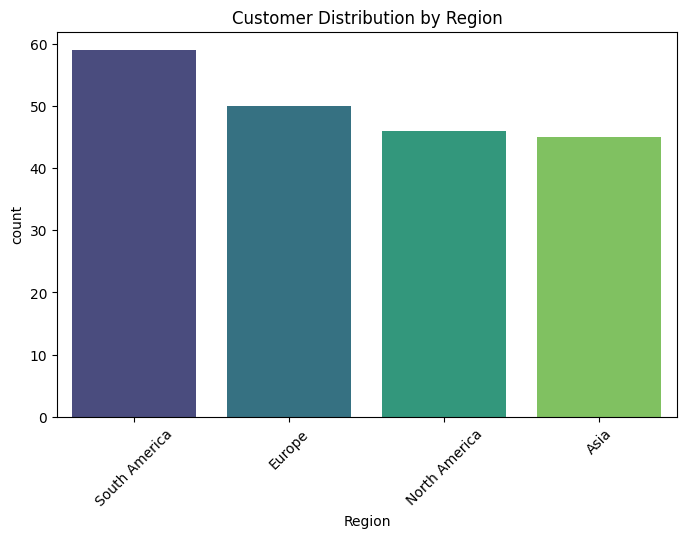

In [22]:
# Exploratory Data Analysis (EDA)

## 1. Customer Distribution by Region
plt.figure(figsize=(8,5))
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

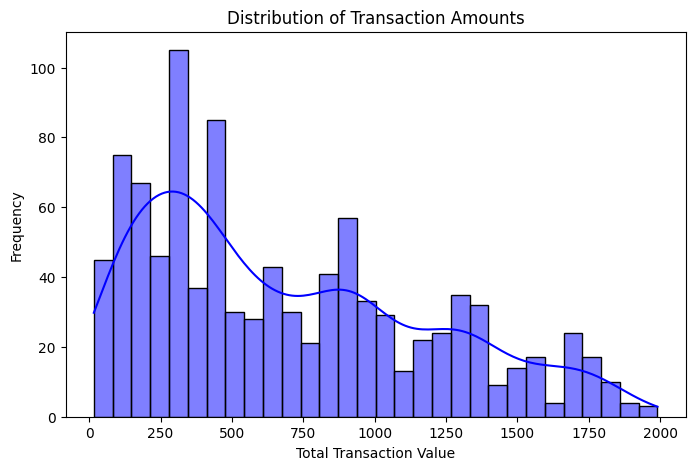

In [23]:
## 2. Distribution of Transaction Amounts
plt.figure(figsize=(8,5))
sns.histplot(merged_df["TotalValue"], bins=30, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Total Transaction Value")
plt.ylabel("Frequency")
plt.show()


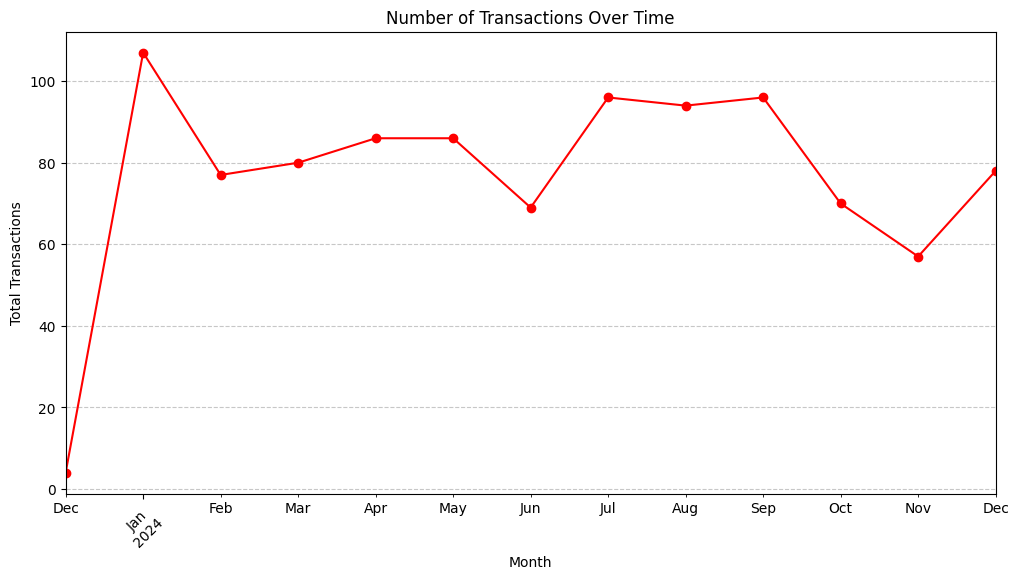

In [24]:
## 3. Monthly Transactions Over Time
merged_df["TransactionMonth"] = merged_df["TransactionDate"].dt.to_period("M")
monthly_transactions = merged_df.groupby("TransactionMonth")["TransactionID"].count()

plt.figure(figsize=(12,6))
monthly_transactions.plot(marker='o', linestyle='-', color="red")
plt.title("Number of Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


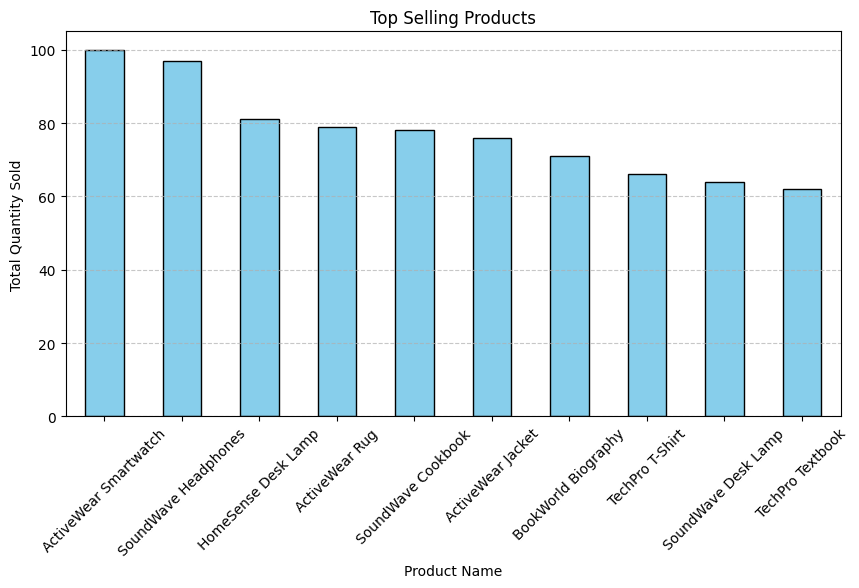

In [25]:
## 4. Top Selling Products
top_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-26-761714658819>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_transaction.index, y=region_avg_transaction.values, palette="coolwarm")


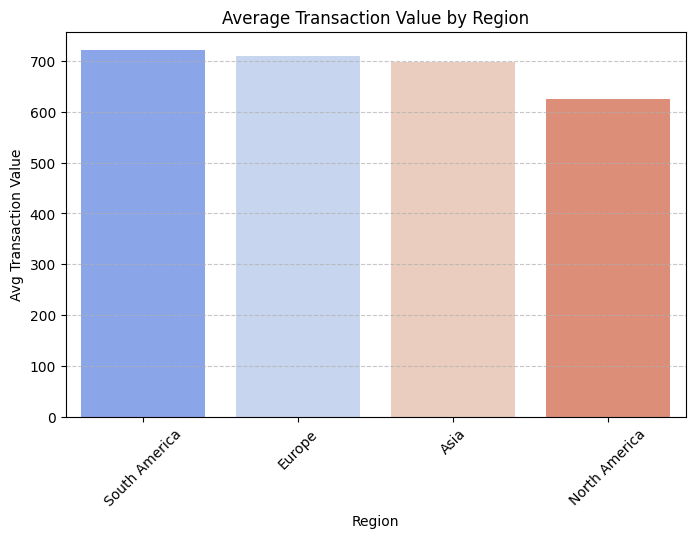

In [26]:
## 5. Average Transaction Value by Region
region_avg_transaction = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=region_avg_transaction.index, y=region_avg_transaction.values, palette="coolwarm")
plt.title("Average Transaction Value by Region")
plt.xticks(rotation=45)
plt.ylabel("Avg Transaction Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

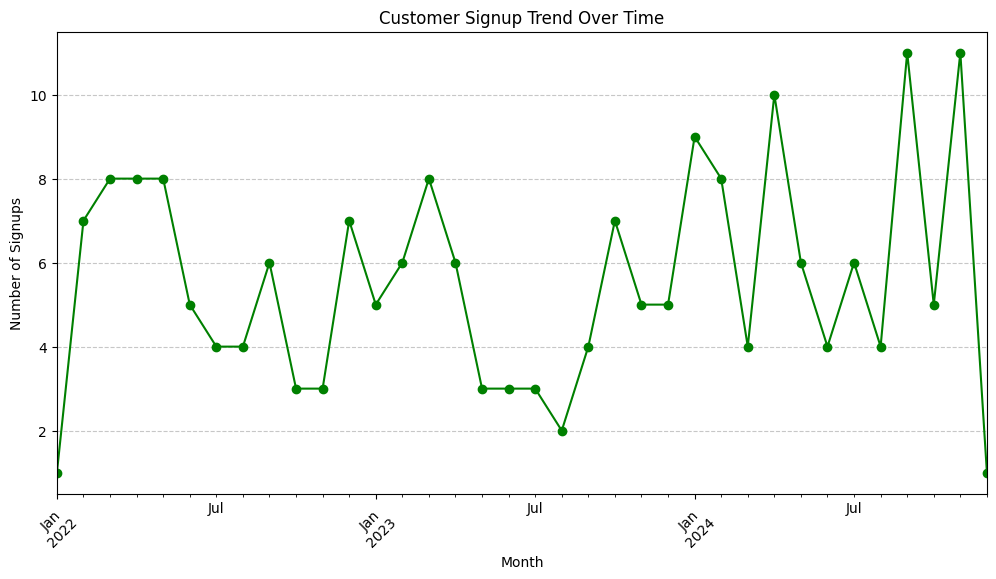

In [27]:
## 6. Customer Signup Trend Over Time
monthly_signups = customers.groupby(customers["SignupDate"].dt.to_period("M"))["CustomerID"].count()

plt.figure(figsize=(12,6))
monthly_signups.plot(marker='o', linestyle='-', color="green")
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


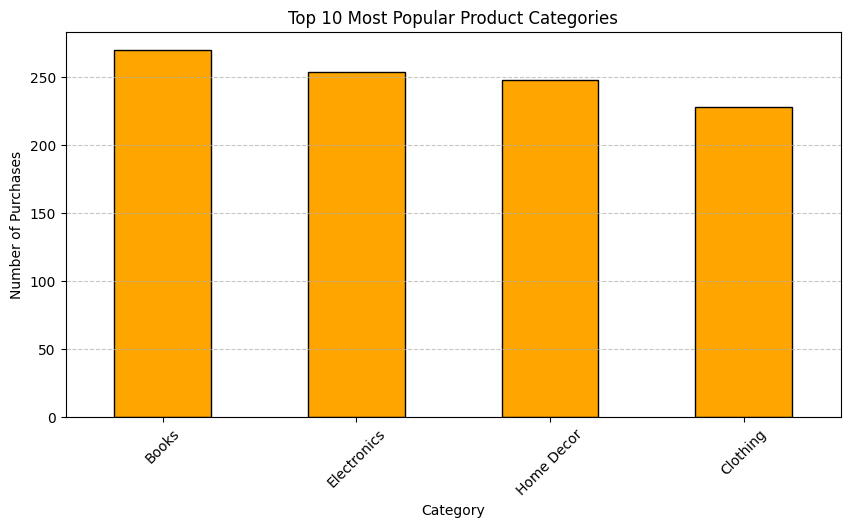

In [28]:
## 7. Most Popular Product Categories
top_categories = merged_df["Category"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_categories.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Top 10 Most Popular Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()